# Projeto Final - Relatório Macroeconômico

O IpeaData é uma plataforma que disponibiliza dados econômicos e socioambientais, abrangendo diversas áreas. Seu serviço de consulta aos dados, acessível por meio da API, permite aos usuários explorar e extrair informações de maneira eficiente. A API Consulta oferece uma interface para recuperar dados diretamente em aplicativos ou scripts.
* [Site oficial do IpeaData](http://www.ipeadata.gov.br/Default.aspx)
* [Serviço de consulta aos dados](http://ipeadata.gov.br/api/)
* [API de Consulta](http://www.ipeadata.gov.br/api/odata4/)

### Instalar bibliotecas

Pandas é uma biblioteca de análise de dados.
* Documentação: https://pandas.pydata.org/

In [28]:
!pipenv install pandas

Installing pandas...
Resolving pandas...
Added pandas to Pipfile's [packages] ...
✔ Installation Succeeded...
⠋ Installing pandas...
Pipfile.lock (2354b6) out of date, updating to (437690)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠸ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (e6eb3f32cd5294271ac26e581b2bb5166c1f5a5f6581fbf912609f30bb437690)!
Installing dependencies from Pipfile.lock (437690)...


Ipeadatapy é uma biblioteca que extrair dados do Ipeadata através de Python usando a API do Ipeadata.
* Documentação: https://www.luanborelli.net/ipeadatapy/docs/index.html

In [29]:
!pipenv install ipeadatapy

Installing ipeadatapy...
Resolving ipeadatapy...
✔ Installation Succeeded
⠋ Installing ipeadatapy...
Installing dependencies from Pipfile.lock (437690)...


### Importando Bibliotecas

In [3]:
import ipeadatapy
import pandas as pd

### Conhecendo a API do IpeaData

A busca na API é realizada por códigos, onde cada base de dados possui o seu código específico. Sendo assim, a execução desta função mostrará todas as séries temporais do Ipeadata com seus respectivos códigos.

In [2]:
ipeadatapy.list_series()

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade
...,...,...
9787,SIS_NMLTINTSUS1000HUF,Número de leitos para internação pelo SUS por ...
9788,SIS_NMLTINTUF,Número de leitos para internação
9789,SIS_NMMED1000HUF,Médicos por 10.000 habitantes
9790,SIS_NMODN1000HUF,Odontólogos por 10.000 habitantes


Está lista também pode ser vizualizadas por meio de uma planilha no excel. Para realizar o download basta clicar [aqui](http://ipeadata.gov.br/doc/api_IPEA_v1_15_2.xlsm)
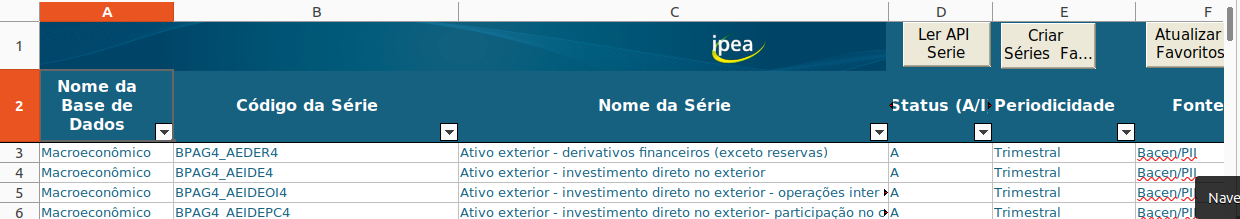

Primeiro vamos precisar de extrar os dados do PIB Nominal, na qual o código da série é 'PAN4_PIBPMV4'.

A execução desta função mostrará a descrição da série do PIB Nominal.

In [4]:
ipeadatapy.describe('PAN4_PIBPMV4')

,PIB nominal
Name,PIB nominal
Code,PAN4_PIBPMV4
Big Theme,Macroeconômico
Theme code,17
Source,Instituto Brasileiro de Geografia e Estatístic...
Source acronym,IBGE/SCN Trim.
Comment,Produto Interno Bruto (PIB) em valores corrent...
Last update,2023-09-04T14:38:00.543-03:00
Frequency,Trimestral
Measure,R$


A execução desta função mostrará o metadata da série do PIB Nominal. Os metadados são — em sua definição mais simples — dados que descrevem dado

In [5]:
ipeadatapy.metadata('PAN4_PIBPMV4')

,CODE,NAME,COMMENT,LAST UPDATE,BIG THEME,SOURCE ACRONYM,SOURCE,SOURCE URL,FREQUENCY,MEASURE,UNIT,SERIES STATUS,THEME CODE,COUNTRY,NUMERICA
0,PAN4_PIBPMV4,PIB nominal,Produto Interno Bruto (PIB) em valores corrent...,2023-09-04T14:38:00.543-03:00,Macroeconômico,IBGE/SCN Trim.,Instituto Brasileiro de Geografia e Estatístic...,www.ibge.gov.br,Trimestral,R$,milhões,A,17,BRA,True


A execução desta função mostrará os dados da série temporal do PIB Nominal.

In [6]:
ipeadatapy.timeseries('PAN4_PIBPMV4')

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
DATE,,,,,,
1996-01-01,PAN4_PIBPMV4,1996-01-01T00:00:00-02:00,1,1,1996,1.893233e+05
1996-04-01,PAN4_PIBPMV4,1996-04-01T00:00:00-03:00,1,4,1996,2.046107e+05
1996-07-01,PAN4_PIBPMV4,1996-07-01T00:00:00-03:00,1,7,1996,2.215132e+05
1996-10-01,PAN4_PIBPMV4,1996-10-01T00:00:00-03:00,1,10,1996,2.393163e+05
1997-01-01,PAN4_PIBPMV4,1997-01-01T00:00:00-02:00,1,1,1997,2.191170e+05
...,...,...,...,...,...,...
2022-04-01,PAN4_PIBPMV4,2022-04-01T00:00:00-03:00,1,4,2022,2.471837e+06
2022-07-01,PAN4_PIBPMV4,2022-07-01T00:00:00-03:00,1,7,2022,2.543645e+06
2022-10-01,PAN4_PIBPMV4,2022-10-01T00:00:00-03:00,1,10,2022,2.584126e+06


É possível filtrar dados de anos e meses específicos, para isso basta adicionar os parâmetro 'year' e 'month' na função.

In [7]:
ipeadatapy.timeseries("PAN4_PIBPMV4", year=2019, month=4)

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
DATE,,,,,,
2019-04-01,PAN4_PIBPMV4,2019-04-01T00:00:00-03:00,1,4,2019,1.825143e+06


Além disso é possível selecionar dados em um período específicos, para isso basta adicionar os parâmetro 'yearGreaterThan' e 'yearSmallerThan' na função. No exemplo estamos selecionado dados com 2016 > YEAR > 2019.

In [8]:
ipeadatapy.timeseries("PAN4_PIBPMV4", yearGreaterThan=2016, yearSmallerThan=2019)

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
DATE,,,,,,
2017-01-01,PAN4_PIBPMV4,2017-01-01T00:00:00-02:00,1,1,2017,1.585585e+06
2017-04-01,PAN4_PIBPMV4,2017-04-01T00:00:00-03:00,1,4,2017,1.630638e+06
2017-07-01,PAN4_PIBPMV4,2017-07-01T00:00:00-03:00,1,7,2017,1.648631e+06
2017-10-01,PAN4_PIBPMV4,2017-10-01T00:00:00-03:00,1,10,2017,1.720626e+06
2018-01-01,PAN4_PIBPMV4,2018-01-01T00:00:00-02:00,1,1,2018,1.682460e+06
2018-04-01,PAN4_PIBPMV4,2018-04-01T00:00:00-03:00,1,4,2018,1.734454e+06
2018-07-01,PAN4_PIBPMV4,2018-07-01T00:00:00-03:00,1,7,2018,1.767868e+06
2018-10-01,PAN4_PIBPMV4,2018-10-01T00:00:00-03:00,1,10,2018,1.819359e+06


Com isso, vamos criar um dataframe apenas com os dados do PIB nominal apartir do ano de 1996 até o ano de 2022.

In [35]:
df_pib = ipeadatapy.timeseries('PAN4_PIBPMV4', yearGreaterThan=1996, yearSmallerThan=2022)
df_pib

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
DATE,,,,,,
1997-01-01,PAN4_PIBPMV4,1997-01-01T00:00:00-02:00,1,1,1997,2.191170e+05
1997-04-01,PAN4_PIBPMV4,1997-04-01T00:00:00-03:00,1,4,1997,2.328895e+05
1997-07-01,PAN4_PIBPMV4,1997-07-01T00:00:00-03:00,1,7,1997,2.461785e+05
1997-10-01,PAN4_PIBPMV4,1997-10-01T00:00:00-03:00,1,10,1997,2.539041e+05
1998-01-01,PAN4_PIBPMV4,1998-01-01T00:00:00-02:00,1,1,1998,2.357007e+05
...,...,...,...,...,...,...
2020-10-01,PAN4_PIBPMV4,2020-10-01T00:00:00-03:00,1,10,2020,2.048979e+06
2021-01-01,PAN4_PIBPMV4,2021-01-01T00:00:00-03:00,1,1,2021,2.152622e+06
2021-04-01,PAN4_PIBPMV4,2021-04-01T00:00:00-03:00,1,4,2021,2.182049e+06


Filtrando apenas a coluna com os valores nominais em R$

In [36]:
df_pib = df_pib[["VALUE (R$)"]]
df_pib

,VALUE (R$)
DATE,
1997-01-01,2.191170e+05
1997-04-01,2.328895e+05
1997-07-01,2.461785e+05
1997-10-01,2.539041e+05
1998-01-01,2.357007e+05
...,...
2020-10-01,2.048979e+06
2021-01-01,2.152622e+06
2021-04-01,2.182049e+06


Renomeando a coluna

In [38]:
df_pib.columns = ['PIB_NOMINAL_R$']
df_pib

,PIB_NOMINAL_R$
DATE,
1997-01-01,2.191170e+05
1997-04-01,2.328895e+05
1997-07-01,2.461785e+05
1997-10-01,2.539041e+05
1998-01-01,2.357007e+05
...,...
2020-10-01,2.048979e+06
2021-01-01,2.152622e+06
2021-04-01,2.182049e+06


Agora iremos repetir o mesmo processo para extrairmos os dados do IPCA, código da série é 'PAN4_IPCAG4'.

In [39]:
df_ipca = ipeadatapy.timeseries('PAN4_IPCAG4', yearGreaterThan=1996, yearSmallerThan=2022)
df_ipca = df_ipca[["VALUE ((% a.a.))"]]
df_ipca.columns = ['IPCA_%AA']
df_ipca

,IPCA_%AA
DATE,
1997-01-01,9.116208
1997-04-01,7.566634
1997-07-01,1.044278
1997-10-01,3.367954
1998-01-01,6.207258
...,...
2020-10-01,13.126541
2021-01-01,8.466157
2021-04-01,6.885669


Vamos juntar o dataframe do PIB Nominal com o dataframe do IPCA por meio do indice 'DATE'

In [41]:
df = pd.merge(df_pib, df_ipca, on = "DATE")
df

,PIB_NOMINAL_R$,IPCA_%AA
DATE,,
1997-01-01,2.191170e+05,9.116208
1997-04-01,2.328895e+05,7.566634
1997-07-01,2.461785e+05,1.044278
1997-10-01,2.539041e+05,3.367954
1998-01-01,2.357007e+05,6.207258
...,...,...
2020-10-01,2.048979e+06,13.126541
2021-01-01,2.152622e+06,8.466157
2021-04-01,2.182049e+06,6.885669


### Deflacionar o PIB Nominal

Para deflacionar, precisamos calcular o deflator, que nada mais é do que converter o IPCA de porcentagem para um índice multiplicativo.

In [42]:
df['DEFLATOR'] = 1 + df['IPCA_%AA'] / 100
df

,PIB_NOMINAL_R$,IPCA_%AA,DEFLATOR
DATE,,,
1997-01-01,2.191170e+05,9.116208,1.091162
1997-04-01,2.328895e+05,7.566634,1.075666
1997-07-01,2.461785e+05,1.044278,1.010443
1997-10-01,2.539041e+05,3.367954,1.033680
1998-01-01,2.357007e+05,6.207258,1.062073
...,...,...,...
2020-10-01,2.048979e+06,13.126541,1.131265
2021-01-01,2.152622e+06,8.466157,1.084662
2021-04-01,2.182049e+06,6.885669,1.068857


Em seguida, vamos calcular o PIB real (PIB Nominal deflacionado)

In [27]:
df['PIB_REAL'] = df['PIB_NOMIANL_R$'] / df['DEFLATOR']
df

,PIB_R$,IPCA_%AA,Deflator,PIB_Real
DATE,,,,
1997-01-01,2.191170e+05,9.116208,1.091162,2.008107e+05
1997-04-01,2.328895e+05,7.566634,1.075666,2.165072e+05
1997-07-01,2.461785e+05,1.044278,1.010443,2.436343e+05
1997-10-01,2.539041e+05,3.367954,1.033680,2.456314e+05
1998-01-01,2.357007e+05,6.207258,1.062073,2.219252e+05
...,...,...,...,...
2020-10-01,2.048979e+06,13.126541,1.131265,1.811227e+06
2021-01-01,2.152622e+06,8.466157,1.084662,1.984602e+06
2021-04-01,2.182049e+06,6.885669,1.068857,2.041479e+06
